In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from seaborn import heatmap

In [10]:
def create_dataset():
    x_train = np.array([-4,-3,-2,-1,1]).reshape(-1,1)
    y_train = np.sin(x_train)
    x_test = np.arange(-5,5,.2).reshape(-1,1)

    return x_train,y_train,x_test

In [11]:
def kernel(x1,x2,scale=1.0, sig_f = 1.0):
    sqdist = np.sum(x1 ** 2, 1).reshape(-1,1) + np.sum(x2 ** 2,1) - 2 * np.dot(x1,x2.T)
    return sig_f ** 2 * np.exp(-.5 / scale ** 2 * sqdist)

In [12]:
def plot_graph(mean, covar, x, x_train, y_train, samples=[]):
    x = x.ravel()
    mean = mean.ravel()
    uncertainity = 1.96 * np.sqrt(np.diag(covar))

    plt.fill_between(x, mean + uncertainity, mean - uncertainity, alpha=0.1)
    plt.plot(x,mean,label='mean')

    for i, sample in samples:
        plt.plot(x,sample, lw=1,ls='--', label='sample {}'.format(i+1))
    
    if x_train is not None:
        plt.plot(x_train, y_train, 'ro')
    
    plt.legend()

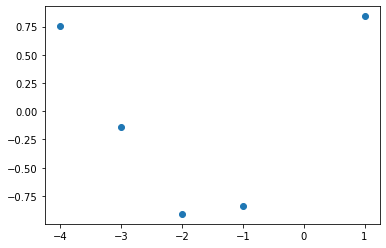

In [13]:
x_train, y_train, x_test = create_dataset()
plt.scatter(x_train,y_train)

In [14]:
beta = 25
C = kernel(x_train, x_train)
k = kernel(x_train, x_test)
c = kernel(x_test,x_test)

In [17]:
C = C + np.eye(C.shape[0]) * (1 / beta)
L = np.linalg.cholesky(C)
alpha = np.dot(np.linalg.inv(L.T), np.dot(np.linalg.inv(L), y_train))
f = np.dot(k.T, alpha)
v = np.dot(np.linalg.inv(L),k)
var = c - np.dot(v.T, v)

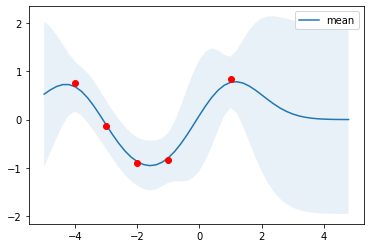

In [18]:
plot_graph(f,var,x_test,x_train,y_train)